<a href="https://colab.research.google.com/github/NaghmeM/Machin-Learning/blob/main/All_models_for_Falcon9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# **Plot the confusion matrix**

In [ ]:
def plot_confusion_matrix(y,y_predict,labels=None):
    "Generate a confusion matrix and plot it using seaborn."
    from sklearn.metrics import confusion_matrix
    # Generate confusion matrix
    cm = confusion_matrix(y, y_predict, labels=labels)
    # Plot using seaborn
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])


# **Load Data Frame**

In [ ]:
df = pd.read_csv('dataset_falcon9.csv')
df.head(20)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


# Load Pre-processed Data made before

In [ ]:
df_pr = pd.read_csv('preprocessed_dataset.csv')
df_pr.head(20)

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,3325.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,2296.000000,1,0,0,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,7,1316.000000,1,0,0,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,8,4535.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,4428.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     int64  
 4   Reused                               90 non-null     int64  
 5   Legs                                 90 non-null     int64  
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Class                                90 non-null     int64  
 9   Orbit_ES-L1                          90 non-null     int64  
 10  Orbit_GEO                            90 non-null     int64  
 11  Orbit_GTO                         

# **Define X and Y**

In [ ]:
X = df_pr.drop("Class", axis=1)
Y = df_pr["Class"]

# **Standarzed** **Feature**

In [ ]:
transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)
X_scaled

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

#**Train Test Spilit**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=112)

#**Logistic Regression**

In [ ]:
lr=LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Increase the range of C values
    'penalty': ['l1', 'l2'],  # Try both 'l1' and 'l2' penalties
    'solver': ['lbfgs', 'liblinear', 'newton-cg']  # Try multiple solvers
}
logreg_cv = GridSearchCV(lr, parameters,cv=4)
logreg_cv.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.96875


#*Matrix to compare the result of different Method*



In [ ]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test,Y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,Y_test)

0.8518518518518519

#**Confusion Matrix**

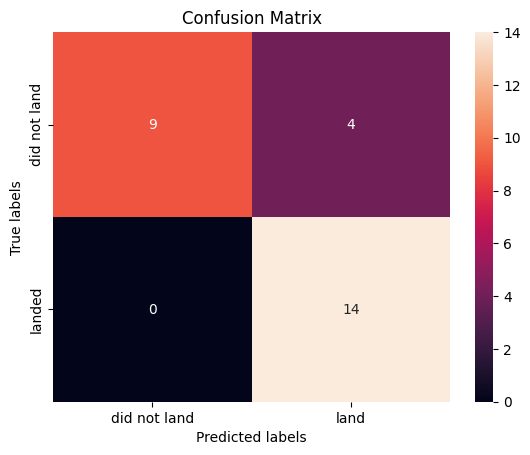

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#**Support Vector Machine**

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': (0.5, 1, 1.5)}
svm = SVC()

In [ ]:
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.5, 'kernel': 'linear'}
accuracy : 0.9666666666666668


In [ ]:
accu.append(svm_cv.score(X_test,Y_test))
methods.append('support vector machine')
svm_cv.score(X_test,Y_test)

0.8518518518518519

#**Confusion Matrix**

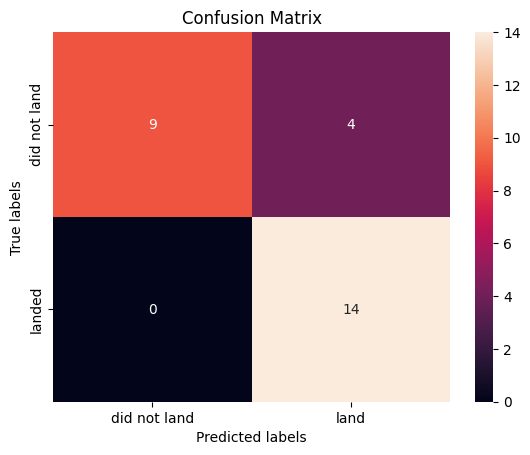

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#**Decision Trees**

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9547619047619047


In [ ]:
accu.append(tree_cv.score(X_test,Y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,Y_test)

0.8518518518518519

#**Confusion Matrix**

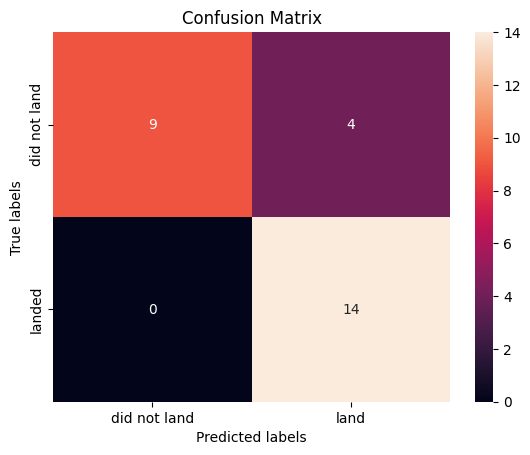

In [ ]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#**K Nearest Neighbors**

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 0.9357142857142857


In [ ]:
accu.append(knn_cv.score(X_test,Y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,Y_test)

0.7777777777777778

#**Confusion Matrix**

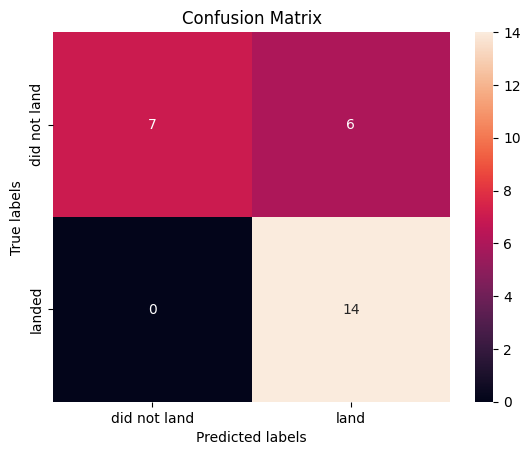

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#** Find the method Perform Best **

In [ ]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'k nearest neighbors']
[0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.7777777777777778]


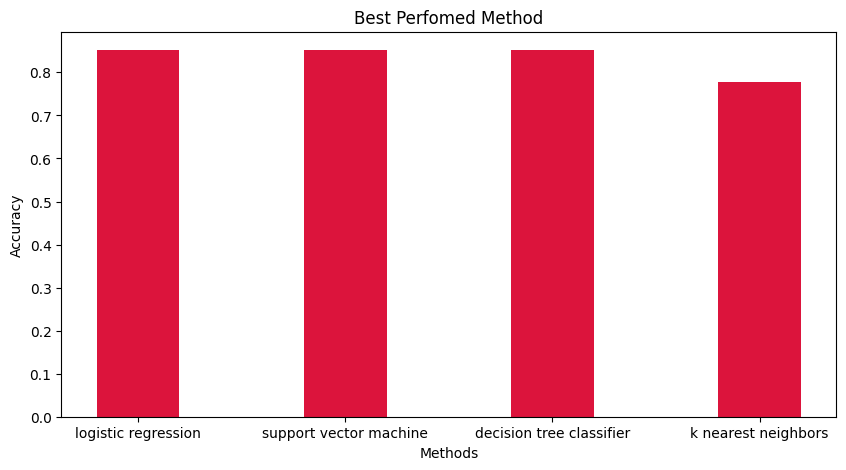

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(methods, accu, color ='crimson',
        width = 0.4)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, 'Area Under ROC')

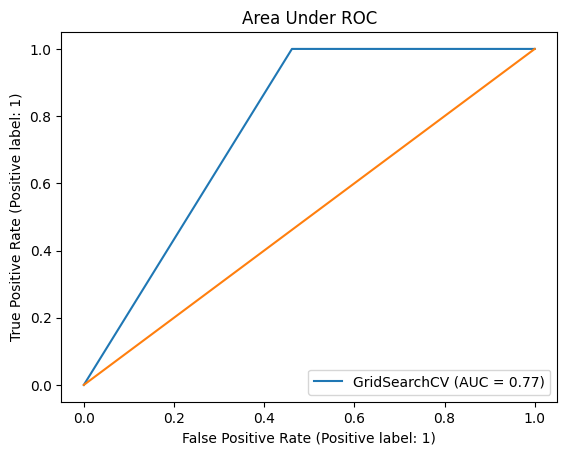

In [ ]:
RocCurveDisplay.from_estimator(knn_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC')